WS 1 Mean Max Min

In [2]:
import numpy as np
import pandas as pd
datas = [1.2, 2.3, 1.5, 2,3, 1.8, 1.4, 2.5]
ds = pd.Series(datas)
print(ds.mean())
print(ds.max())
print(ds.min())
print(ds.std())

1.9625
3.0
1.2
0.611642986436649


In [3]:
ds.values

array([1.2, 2.3, 1.5, 2. , 3. , 1.8, 1.4, 2.5])

WS 2 Mean Max Min from excel

In [24]:
uri = "data/stats_freq.xlsx"
df = pd.read_excel(uri)
df.dtypes

Name       object
Age         int64
Buy       float64
Sex         int64
Gender     object
Date       object
dtype: object

In [25]:
df.Sex = df.Sex.astype("category")
df.dtypes

Name        object
Age          int64
Buy        float64
Sex       category
Gender      object
Date        object
dtype: object

In [28]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_num = df.select_dtypes(include=[np.number])

# คำนวณค่าเฉลี่ย
df_num.mean()

Age    27.0000
Buy     1.9625
dtype: float64

In [30]:
print(df_num.max())
print(df_num.min())
print(df_num.std())

Age    35.0
Buy     3.0
dtype: float64
Age    22.0
Buy     1.2
dtype: float64
Age    4.472136
Buy    0.611643
dtype: float64


In [31]:
df_num.describe()

,Age,Buy
count,8.000000,8.000000
mean,27.000000,1.962500
std,4.472136,0.611643
min,22.000000,1.200000
25%,24.500000,1.475000
50%,25.500000,1.900000
75%,29.000000,2.350000
max,35.000000,3.000000


WS 3 Median (มัธยฐาน)

In [33]:
datas = [1.2, 2.3, 1.5, 2, 3, 1.8, 1.4, 2.5]
ds = pd.Series(datas)
ds.median()

1.9

In [35]:
ds.sort_values().values

array([1.2, 1.4, 1.5, 1.8, 2. , 2.3, 2.5, 3. ])

WS 4 Mode from data file

In [41]:
uri = "data/stats_freq.xlsx"
df = pd.read_excel(uri)

df.Sex = df.Sex.astype("category")

df.Buy.median()

1.9

WS 5 Mode

In [47]:
datas = [25, 22, 25, 35, 32, 28, 23,26]
ds = pd.Series(datas)
ds.mode()

0    25
dtype: int64

WS 6 Mode from data file

In [49]:
uri = "data/stats_freq.xlsx"
df = pd.read_excel(uri)

df.Sex = df.Sex.astype("category")

df.Age.mode()

0    25
Name: Age, dtype: int64

WS 7 Quantile

In [50]:
datas = [8, 4, 10, 2, 6, 5, 1, 7, 9, 3, 0]
ds = pd.Series(datas)

ds.describe()

count    11.000000
mean      5.000000
std       3.316625
min       0.000000
25%       2.500000
50%       5.000000
75%       7.500000
max      10.000000
dtype: float64

In [53]:
ds.quantile([0.25, 0.5, 0.75])

0.25    2.5
0.50    5.0
0.75    7.5
dtype: float64

WS 8 Frequency Distribution

In [68]:
datas = [1, 2, 1, 2, 1, 1, 1, 2]
ds = pd.Series(datas)
ds = ds.replace({1:"Male", 2:"Female"})

print(ds.value_counts())
print("Total", ds.count())

Male      5
Female    3
Name: count, dtype: int64
Total 8


<Axes: >

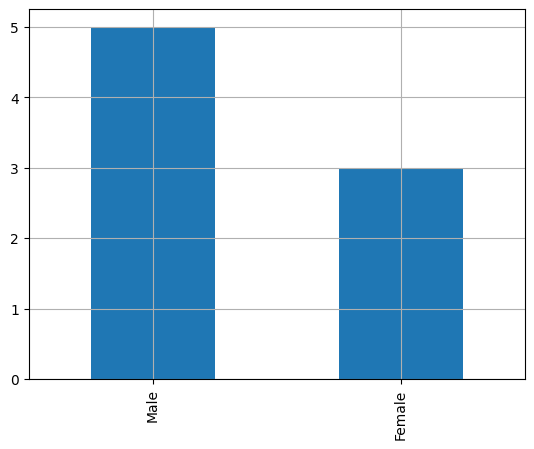

In [69]:
ds.value_counts().plot.bar(grid=True)

WS 9 Read files (Histogram)

Sex
1    5
2    3
Name: count, dtype: int64
Gender
M    5
F    3
Name: count, dtype: int64


<Axes: xlabel='Gender'>

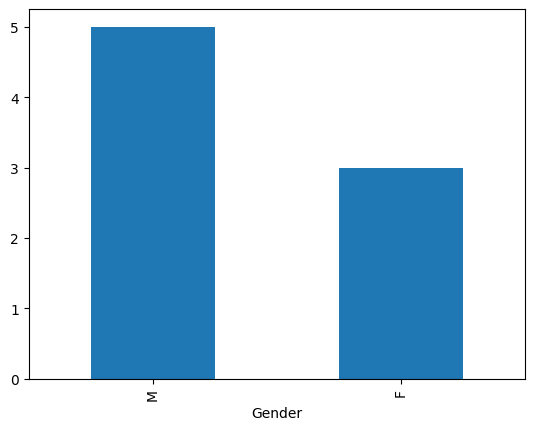

In [76]:
uri = "data/stats_freq.xlsx"
df = pd.read_excel(uri)

print(df.Sex.value_counts())
print(df.Gender.value_counts())

df.Gender.value_counts().plot.bar(grid = False)

<Axes: xlabel='Sex'>

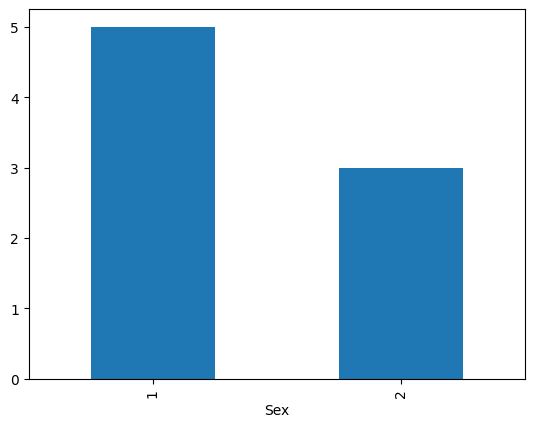

In [77]:
df.Sex.value_counts().plot.bar(grid = False)

In [83]:
def binary_addition(A, B):
    max_len = max(len(A), len(B))
    
    # เติมเลข 0 ให้สองลิสต์มีขนาดเท่ากัน
    A = [0] * (max_len - len(A)) + A
    B = [0] * (max_len - len(B)) + B
    
    # เตรียมลิสต์สำหรับผลลัพธ์และค่าเริ่มต้นของคาร์รี่
    result = [0] * (max_len + 1)
    carry = 0
    
    # บวกจากขวาไปซ้าย
    for i in range(max_len - 1, -1, -1):
        total = A[i] + B[i] + carry
        result[i + 1] = total % 2  # ค่าในตำแหน่งปัจจุบัน
        carry = total // 2  # คาร์รี่สำหรับตำแหน่งถัดไป
    # ถ้ามีคาร์รี่เหลืออยู่ที่ตำแหน่งสูงสุด
    result[0] = carry
    
    i = 4
    temp = 0
    while (i>=0):
        result[i] = result[i] + temp + C
        if result[i] == 1:
            break
        elif result[i] == 2:
            result[i] = 0
            temp = 1
        elif result[i] == 3:
            result[i] = 1
            temp = 1
        else:
            temp = 0
        i -= 1
    
    return result

# ตัวอย่างการใช้
A = [0,0,1,0]  # แทนเลขฐานสอง 1111 (15 ในฐานสิบ)
B = [1,1,0,1]  # แทนเลขฐานสอง 0001 (1 ในฐานสิบ)
C = 0

for i in range(0,4):
    if B[i]==1 :
        B[i] = 0
    else :
        B[i] = 1

result = binary_addition(A, B)
print(result)

[0, 0, 1, 0, 0]
